## Distributed Bandits Attack against DeepAPI

Paper link: https://arxiv.org/abs/1807.07978

In [1]:
from bat.attacks import BanditsAttack
from bat.apis.deepapi import DeepAPI_Inceptionv3_ImageNet

In [2]:
import numpy as np
np.set_printoptions(suppress=True)

from PIL import Image

## Step 1: Load image and make predictions

In [3]:
# Load Image 
x = np.array(Image.open("cat.jpg").resize((299, 299)))

In [4]:
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
%matplotlib inline

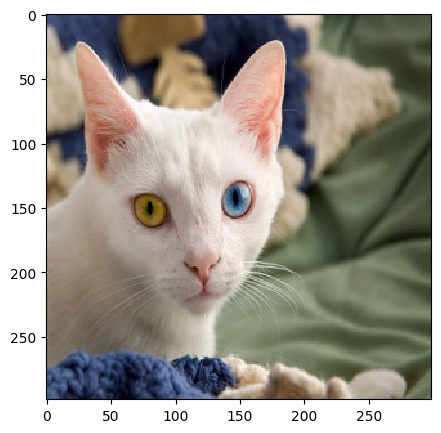

In [5]:
plt.figure(figsize = (5, 5))
plt.imshow(x, interpolation='nearest')

In [6]:
# Initialize the DeepAPI Model
model = DeepAPI_Inceptionv3_ImageNet("http://localhost:8080")

In [7]:
# Get Preditction
y_pred = model.predict(np.array([x]))[0]

# Print result
model.print(y_pred)
print()
print('Prediction', np.argmax(y_pred), model.get_class_name(np.argmax(y_pred)))


bow_tie                        0.48425
Egyptian_cat                   0.08364
swab                           0.05456
stole                          0.01611
head_cabbage                   0.01587
quilt                          0.00920
velvet                         0.00886
plastic_bag                    0.00840
dishrag                        0.00799
Siamese_cat                    0.00685
zucchini                       0.00000
zebra                          0.00000
yurt                           0.00000
yellow_lady's_slipper          0.00000
yawl                           0.00000
wreck                          0.00000
worm_fence                     0.00000
wool                           0.00000
wooden_spoon                   0.00000
wood_rabbit                    0.00000
wombat                         0.00000
wolf_spider                    0.00000
wok                            0.00000
wire-haired_fox_terrier        0.00000
wing                           0.00000
wine_bottle             

## Step 2: Apply the Bandits Attack

In [8]:
bandits_attack = BanditsAttack(model)
x_adv = bandits_attack.attack(np.array([x]), np.array([np.argmax(y_pred)]), epsilon = 0.05, max_it=3000, online_lr=100, concurrency=8)

Clean accuracy: 100.00%


Distributed Bandits Attack (Vertical):   0%|          | 0/375 [00:01<?, ?it/s, Total Queries=24, Mean Higest Prediction=0.512, Attack Success Rate=1, Avg Queries=24]


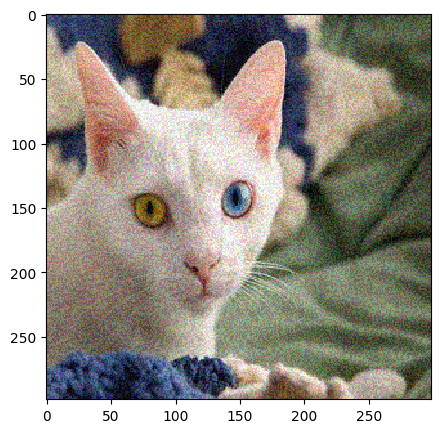

In [9]:
plt.figure(figsize = (5, 5))
plt.imshow(x_adv[0], interpolation='nearest')

In [10]:
# Get predictions after attack
y_adv = model.predict(x_adv)[0]

# Print result
model.print(y_adv)
print()
print('Prediction', np.argmax(y_adv), model.get_class_name(np.argmax(y_adv)))


broccoli                       0.51150
Egyptian_cat                   0.11893
bow_tie                        0.07059
cauliflower                    0.01675
bath_towel                     0.01432
quilt                          0.01216
head_cabbage                   0.01113
Angora                         0.01033
handkerchief                   0.00790
window_screen                  0.00686
zucchini                       0.00000
zebra                          0.00000
yurt                           0.00000
yellow_lady's_slipper          0.00000
yawl                           0.00000
wreck                          0.00000
worm_fence                     0.00000
wool                           0.00000
wooden_spoon                   0.00000
wood_rabbit                    0.00000
wombat                         0.00000
wolf_spider                    0.00000
wok                            0.00000
wire-haired_fox_terrier        0.00000
wing                           0.00000
wine_bottle             